In [1]:
import pandas as pd
import numpy as np
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data.csv')

#Get total views
videoKeys = list(df.columns)
videoKeys.remove("Unnamed: 0")
df['sumVideoViews'] = df[videoKeys].sum(axis=1)

In [3]:

#Extract Country,Age and Gender
df['country'] = df['Unnamed: 0'].str.split("_",expand=True)[0]
df['age'] = df['Unnamed: 0'].str.split("_",expand=True)[1]
df['gender'] = df['Unnamed: 0'].str.split("_",expand=True)[2]

df = df.drop('Unnamed: 0',axis=1)

In [4]:
print("Total Views",df[videoKeys].sum(axis=0).sum())

Total Views 1581079336


In [5]:
df.loc[df.age=="65-",'age'] = "65+" #Minor Fix

In [6]:
df.groupby("age")["sumVideoViews"].sum().sort_values(ascending=False)

age
25-34    379308837
35-44    266945329
18-24    251841056
45-54    225989220
55-64    177114047
65+      156130826
13-17    123750021
Name: sumVideoViews, dtype: int64

In [7]:
df.groupby("country")["sumVideoViews"].sum().sort_values(ascending=False)[:10]

country
US    114584035
IN     56850635
GB     38824159
CA     32873633
MY     21705597
PK     20176644
AU     19427786
PH     18552997
DE     16990377
ZA     16731074
Name: sumVideoViews, dtype: int64

In [8]:
dralgos = ["Clustering","PCA","NMF","LDA","SE","UMAP"]

In [9]:
def fixAge(temp): #Change Age Format
    for i in range(temp.iloc[1,1:].shape[0]):
        if int(temp.iloc[1,1+i]) <= 17:
            temp.iloc[1,1+i] = "13-17"
        elif int(temp.iloc[1,1+i]) > 17 and int(temp.iloc[1,1+i]) <= 24:
            temp.iloc[1,1+i] = "18-24"
        elif int(temp.iloc[1,1+i]) > 24 and int(temp.iloc[1,1+i]) <= 34:
            temp.iloc[1,1+i] = "25-34"
        elif int(temp.iloc[1,1+i]) > 34 and int(temp.iloc[1,1+i]) <= 44:
            temp.iloc[1,1+i] = "35-44"
        elif int(temp.iloc[1,1+i]) > 44 and int(temp.iloc[1,1+i]) <= 54:
            temp.iloc[1,1+i] = "45-54"
        elif int(temp.iloc[1,1+i]) > 54 and int(temp.iloc[1,1+i]) <= 64:
            temp.iloc[1,1+i] = "55-64"
        elif int(temp.iloc[1,1+i]) > 64:
            temp.iloc[1,1+i] = "65+"

    return temp

# Statistical Parity

Calculating Statistical Parity of all age, gender and top 6 countries

In [10]:
totalViews = df["sumVideoViews"].sum()

outputDF = pd.DataFrame(columns=["Dimensionality Reduction Algorithm","Number of Personas","GroupName","Subject","Percentage in Original Data","Unique Values in Original Data","Count in Persona Set","Percentage in Persona set","Total Unique Values in Persona Set","Statistical Parity"])


dfs = []
for dralgo in dralgos:
    for i in range(3):
        temp = pd.read_excel("personas/"+dralgo+".xlsx",sheet_name=2-i)
        temp = fixAge(temp)
        dfs.append([temp,temp.shape[1]-1,dralgo])


totalMale = df.loc[df["gender"]=="male"].groupby("gender")["sumVideoViews"].sum().values[0]


for cdf in dfs:
    cTotal = (cdf[0].iloc[2,1:].values=="male").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Gender","Male",np.round(totalMale/totalViews*100,3),df["gender"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[2,1:].nunique(),np.round(cTotal/cdf[1]-totalMale/totalViews,3)]], columns=outputDF.columns))

totalCountry = df.loc[df["country"]=="US"].groupby("country")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[3,1:].values=="United States").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Country","USA",np.round(totalCountry/totalViews*100,3),df["country"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[3,1:].nunique(),np.round(cTotal/cdf[1]-totalCountry/totalViews,3)]], columns=outputDF.columns))

totalCountry = df.loc[df["country"]=="IN"].groupby("country")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[3,1:].values=="India").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Country","India",np.round(totalCountry/totalViews*100,3),df["country"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[3,1:].nunique(),np.round(cTotal/cdf[1]-totalCountry/totalViews,3)]], columns=outputDF.columns))

totalCountry = df.loc[df["country"]=="GB"].groupby("country")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[3,1:].values=="United Kingdom").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Country","United Kingdom",np.round(totalCountry/totalViews*100,3),df["country"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[3,1:].nunique(),np.round(cTotal/cdf[1]-totalCountry/totalViews,3)]], columns=outputDF.columns))

totalCountry = df.loc[df["country"]=="CA"].groupby("country")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[3,1:].values=="Canada").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Country","Canada",np.round(totalCountry/totalViews*100,3),df["country"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[3,1:].nunique(),np.round(cTotal/cdf[1]-totalCountry/totalViews,3)]], columns=outputDF.columns))

    
totalCountry = df.loc[df["country"]=="MY"].groupby("country")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[3,1:].values=="Malaysia").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Country","Malaysia",np.round(totalCountry/totalViews*100,3),df["country"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[3,1:].nunique(),np.round(cTotal/cdf[1]-totalCountry/totalViews,3)]], columns=outputDF.columns))

totalCountry = df.loc[df["country"]=="AU"].groupby("country")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[3,1:].values=="Australia").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Country","Australia",np.round(totalCountry/totalViews*100,3),df["country"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[3,1:].nunique(),np.round(cTotal/cdf[1]-totalCountry/totalViews,3)]], columns=outputDF.columns))

    
totalAge = df.loc[df["age"]=="25-34"].groupby("age")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[1,1:].values=="25-34").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Age","25-34",np.round(totalAge/totalViews*100,3),df["age"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[1,1:].nunique(),np.round(cTotal/cdf[1]-totalAge/totalViews,3)]], columns=outputDF.columns))

totalAge = df.loc[df["age"]=="35-44"].groupby("age")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[1,1:].values=="35-44").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Age","35-44",np.round(totalAge/totalViews*100,3),df["age"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[1,1:].nunique(),np.round(cTotal/cdf[1]-totalAge/totalViews,3)]], columns=outputDF.columns))

    
totalAge = df.loc[df["age"]=="18-24"].groupby("age")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[1,1:].values=="18-24").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Age","18-24",np.round(totalAge/totalViews*100,3),df["age"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[1,1:].nunique(),np.round(cTotal/cdf[1]-totalAge/totalViews,3)]], columns=outputDF.columns))

totalAge = df.loc[df["age"]=="45-54"].groupby("age")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[1,1:].values=="45-54").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Age","45-54",np.round(totalAge/totalViews*100,3),df["age"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[1,1:].nunique(),np.round(cTotal/cdf[1]-totalAge/totalViews,3)]], columns=outputDF.columns))

totalAge = df.loc[df["age"]=="55-64"].groupby("age")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[1,1:].values=="55-64").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Age","55-64",np.round(totalAge/totalViews*100,3),df["age"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[1,1:].nunique(),np.round(cTotal/cdf[1]-totalAge/totalViews,3)]], columns=outputDF.columns))

totalAge = df.loc[df["age"]=="65+"].groupby("age")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[1,1:].values=="65+").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Age","65+",np.round(totalAge/totalViews*100,3),df["age"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[1,1:].nunique(),np.round(cTotal/cdf[1]-totalAge/totalViews,3)]], columns=outputDF.columns))

totalAge = df.loc[df["age"]=="13-17"].groupby("age")["sumVideoViews"].sum().values[0]
for cdf in dfs:
    cTotal = (cdf[0].iloc[1,1:].values=="13-17").sum()
    outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Age","13-17",np.round(totalAge/totalViews*100,3),df["age"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[1,1:].nunique(),np.round(cTotal/cdf[1]-totalAge/totalViews,3)]], columns=outputDF.columns))
    


In [11]:
outputDF.head()

,Dimensionality Reduction Algorithm,Number of Personas,GroupName,Subject,Percentage in Original Data,Unique Values in Original Data,Count in Persona Set,Percentage in Persona set,Total Unique Values in Persona Set,Statistical Parity
0,Clustering,5,Gender,Male,59.677,2,4,80.000,2,0.203
0,Clustering,10,Gender,Male,59.677,2,6,60.000,2,0.003
0,Clustering,15,Gender,Male,59.677,2,13,86.667,2,0.270
0,PCA,5,Gender,Male,59.677,2,3,60.000,2,0.003
0,PCA,10,Gender,Male,59.677,2,8,80.000,2,0.203


In [12]:
outputDF.to_csv("stat_parity.csv",index=False)

In [13]:
outputDF['Statistical Parity_Positive'] = np.abs(outputDF['Statistical Parity'])

In [14]:
outputDF.loc[outputDF["GroupName"]=="Country"].groupby(['Dimensionality Reduction Algorithm','GroupName','Number of Personas'])['Statistical Parity_Positive'].mean().to_csv('Country_Stat_Parity_Mean.csv')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [15]:
outputDF.loc[outputDF["GroupName"]=="Age"].groupby(['Dimensionality Reduction Algorithm','GroupName','Number of Personas'])['Statistical Parity_Positive'].mean().to_csv('Age_Stat_Parity_Mean.csv')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [16]:
outputDF.loc[outputDF["GroupName"]=="Gender"].groupby(['Dimensionality Reduction Algorithm','GroupName','Number of Personas'])['Statistical Parity_Positive'].mean().to_csv('Gender_Stat_Parity_Mean.csv')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [17]:
dralgos = ["Clustering","PCA","NMF","LDA","SE","UMAP"]

In [18]:
dralgos_all = ["Clustering-5","Clustering-10","Clustering-15","PCA-5","PCA-10","PCA-15","NMF-5","NMF-10","NMF-15","LDA-5","LDA-10","LDA-15","SE-5","SE-10","SE-15","UMAP-5","UMAP-10","UMAP-15"]

In [19]:
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x)

In [20]:
#Country in Persona set contain full name. So we change the code of countries to their full name first.
df['country'] = df['country'].map({
    "US":"United States",
    "IN":"India",
    "MY":"Malaysia",
    "GB":"United Kingdom",
    "RS":"Serbia",
    "PK":"Pakistan",
    "PH":"Philippines",
    "ID":"Indonesia",
    "SG":"Singapore",
    "NA":"Namibia",
    "DM":"Dominica",
    "NG":"Nigeria",
    "PL":"Poland",
    "BD":"Bangladesh",
    "FO":"Faroe Islands",
    "GD":"Grenada",
    "BW":"Botswana",
    "VE":"Venezuela, Bolivarian Republic of",
    "CA":"Canada",
    "KE":"Kenya",
    "SV":"El Salvador",
    "BY":"Belarus",
    "BR":"Brazil",
    "SR":"Suriname",
    "AE":"United Arab Emirates",
    "QA":"Qatar",
    "ZA":"South Africa",
    "ZW":"Zimbabwe",
    "SL":"Sierra Leone",
    "HU":"Hungary",
    "AU":"Australia",
    "MR":"Mauritania",
    "UG":"Uganda",
    "NL":"Netherlands",
    "MV":"Maldives",
    "FJ":"Fiji",
    "AZ":"Azerbaijan",
    "GU":"Guam",
    "DK":"Denmark",
    "IE":"Ireland",
    "SY":"Syrian Arab Republic",
    "CI":"Côte d'Ivoire",
    "EE":"Estonia",
    "AG":"Antigua and Barbuda",
    "GM":"Gambia",
    "LT":"Lithuania",
    "BA":"Bosnia and Herzegovina",
    "MZ":"Mozambique",
    "FI":"Finland",
    "AI":"Anguilla" 
})

In [21]:
for i in range(6):
    outputDF = pd.DataFrame(columns=["Country","SHARE OF PERSONAS","SHARE OF BASELINE"])

    uniqueCountries1 = dfs[i*3][0].iloc[3,1:].tolist()
    uniqueCountries2 = dfs[i*3+1][0].iloc[3,1:].tolist()
    uniqueCountries3 = dfs[i*3+2][0].iloc[3,1:].tolist()
    
    uniqueCountries = unique(uniqueCountries1+uniqueCountries2+uniqueCountries3)
    countt = Counter(uniqueCountries1+uniqueCountries2+uniqueCountries3)
    
    for country in uniqueCountries:
        outputDF = outputDF.append(pd.DataFrame([[country,countt[country]/30*100,df.loc[df["country"]==country]['sumVideoViews'].sum()/totalViews*100]], columns=outputDF.columns))
    
    outputDF.to_csv("countrydata2/country_"+dralgos[i]+".csv",index=False)

In [22]:
outputDF.head()

,Country,SHARE OF PERSONAS,SHARE OF BASELINE
0,Anguilla,3.333333,0.078326
0,Bangladesh,6.666667,0.908098
0,Belarus,3.333333,0.567564
0,Bosnia and Herzegovina,6.666667,0.550162
0,Botswana,3.333333,0.502054


# Jaccard

In [23]:
def jaccard(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
dralgos = ["Clustering","PCA","NMF","LDA","SE","UMAP"]

## Country

In [24]:
allvalues = []
for i in range(6):
    values1 = dfs[i*3][0].iloc[3,1:].tolist()
    values2 = dfs[i*3+1][0].iloc[3,1:].tolist()
    values3 = dfs[i*3+1][0].iloc[3,1:].tolist()
    
    values = set(values1+values2+values3)
    
    allvalues.append(values)

In [25]:
for i in range(5):
    for j in range(6-i):
        print(dralgos[i],dralgos[i+j],np.round(jaccard(allvalues[i], allvalues[i+j]),3))

Clustering Clustering 1.0
Clustering PCA 0.091
Clustering NMF 0.4
Clustering LDA 0.2
Clustering SE 0.111
Clustering UMAP 0.333
PCA PCA 1.0
PCA NMF 0.182
PCA LDA 0.2
PCA SE 0.778
PCA UMAP 0.2
NMF NMF 1.0
NMF LDA 0.182
NMF SE 0.1
NMF UMAP 0.444
LDA LDA 1.0
LDA SE 0.231
LDA UMAP 0.125
SE SE 1.0
SE UMAP 0.143


## Gender

In [26]:
allvalues = []
for i in range(6):
    values1 = dfs[i*3][0].iloc[2,1:].tolist()
    values2 = dfs[i*3+1][0].iloc[2,1:].tolist()
    values3 = dfs[i*3+1][0].iloc[2,1:].tolist()
    
    values = set(values1+values2+values3)
    
    allvalues.append(values)
    
for i in range(5):
    for j in range(6-i):
        print(dralgos[i],dralgos[i+j],np.round(jaccard(allvalues[i], allvalues[i+j]),3))

Clustering Clustering 1.0
Clustering PCA 1.0
Clustering NMF 1.0
Clustering LDA 1.0
Clustering SE 1.0
Clustering UMAP 1.0
PCA PCA 1.0
PCA NMF 1.0
PCA LDA 1.0
PCA SE 1.0
PCA UMAP 1.0
NMF NMF 1.0
NMF LDA 1.0
NMF SE 1.0
NMF UMAP 1.0
LDA LDA 1.0
LDA SE 1.0
LDA UMAP 1.0
SE SE 1.0
SE UMAP 1.0


## Age

In [27]:
allvalues = []
for i in range(6):
    values1 = dfs[i*3][0].iloc[1,1:].tolist()
    values2 = dfs[i*3+1][0].iloc[1,1:].tolist()
    values3 = dfs[i*3+1][0].iloc[1,1:].tolist()
    
    values = set(values1+values2+values3)
    
    allvalues.append(values)
    
for i in range(5):
    for j in range(6-i):
        print(dralgos[i],dralgos[i+j],np.round(jaccard(allvalues[i], allvalues[i+j]),3))

Clustering Clustering 1.0
Clustering PCA 0.333
Clustering NMF 0.571
Clustering LDA 0.714
Clustering SE 0.833
Clustering UMAP 0.714
PCA PCA 1.0
PCA NMF 0.5
PCA LDA 0.429
PCA SE 0.5
PCA UMAP 0.429
NMF NMF 1.0
NMF LDA 0.857
NMF SE 0.714
NMF UMAP 0.857
LDA LDA 1.0
LDA SE 0.857
LDA UMAP 1.0
SE SE 1.0
SE UMAP 0.857


# Statistical Parity of each and every country in the persona set

In [28]:
totalViews = df["sumVideoViews"].sum()

outputDF = pd.DataFrame(columns=["Dimensionality Reduction Algorithm","Number of Personas","GroupName","Subject","Percentage in Original Data","Unique Values in Original Data","Count in Persona Set","Percentage in Persona set","Total Unique Values in Persona Set","Statistical Parity"])

dfs = []
for dralgo in dralgos:
    for i in range(3):
        temp = pd.read_excel("personas/"+dralgo+".xlsx",sheet_name=2-i)
        temp = fixAge(temp)
        dfs.append([temp,temp.shape[1]-1,dralgo])

In [29]:
df = df.loc[~df["country"].isnull()]

In [30]:
for countr in df.country.unique().tolist():

    totalCountry = df.loc[df["country"]==countr].groupby("country")["sumVideoViews"].sum().values[0]
    for cdf in dfs:
        cTotal = (cdf[0].iloc[3,1:].values==countr).sum()
        outputDF = outputDF.append(pd.DataFrame([[cdf[2],cdf[1],"Country",countr,np.round(totalCountry/totalViews*100,3),df["country"].nunique(),cTotal,np.round(cTotal/cdf[1]*100,3),cdf[0].iloc[3,1:].nunique(),np.round(cTotal/cdf[1]-totalCountry/totalViews,3)]], columns=outputDF.columns))


In [31]:
outputDF['Statistical Parity_Positive'] = np.abs(outputDF['Statistical Parity'])

In [32]:
outputDF

,Dimensionality Reduction Algorithm,Number of Personas,GroupName,Subject,Percentage in Original Data,Unique Values in Original Data,Count in Persona Set,Percentage in Persona set,Total Unique Values in Persona Set,Statistical Parity,Statistical Parity_Positive
0,Clustering,5,Country,United Arab Emirates,0.921,50,0,0.000,1,-0.009,0.009
0,Clustering,10,Country,United Arab Emirates,0.921,50,0,0.000,3,-0.009,0.009
0,Clustering,15,Country,United Arab Emirates,0.921,50,2,13.333,4,0.124,0.124
0,PCA,5,Country,United Arab Emirates,0.921,50,0,0.000,2,-0.009,0.009
0,PCA,10,Country,United Arab Emirates,0.921,50,0,0.000,8,-0.009,0.009
...,...,...,...,...,...,...,...,...,...,...,...
0,SE,10,Country,Zimbabwe,0.632,50,0,0.000,7,-0.006,0.006
0,SE,15,Country,Zimbabwe,0.632,50,0,0.000,10,-0.006,0.006
0,UMAP,5,Country,Zimbabwe,0.632,50,0,0.000,3,-0.006,0.006
0,UMAP,10,Country,Zimbabwe,0.632,50,0,0.000,6,-0.006,0.006


In [33]:
outputDF.loc[outputDF["GroupName"]=="Country"].groupby(['Dimensionality Reduction Algorithm','GroupName','Number of Personas'])['Statistical Parity_Positive'].sum().to_csv('Country3_Stat_Parity_Mean.csv')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Gender Distribution by age

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


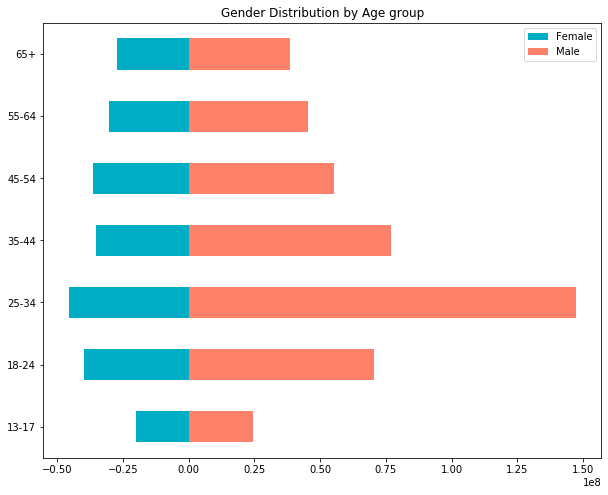

In [34]:
keys = df.age.unique().tolist()
dummy = pd.DataFrame([],
                     columns=["Female", "Male"],
                    index=keys)
for i in range(dummy.shape[0]):
    dummy['Female'].iloc[i] = -df.loc[(df.age==keys[i]) & (df.gender=="female")]['sumVideoViews'].sum()
    dummy['Male'].iloc[i] = df.loc[(df.age==keys[i]) & (df.gender=="male")]['sumVideoViews'].sum()
likert_colors = ['#00adc7', "#ff8169"]
dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True,figsize=(10,8),title="Gender Distribution by Age group")

Female distribution in the baseline data (left-hand sidebars) and in the persona sets (right-hand sidebars) across all three
persona generations. LDA and UMAP generate female personas from most age groups.

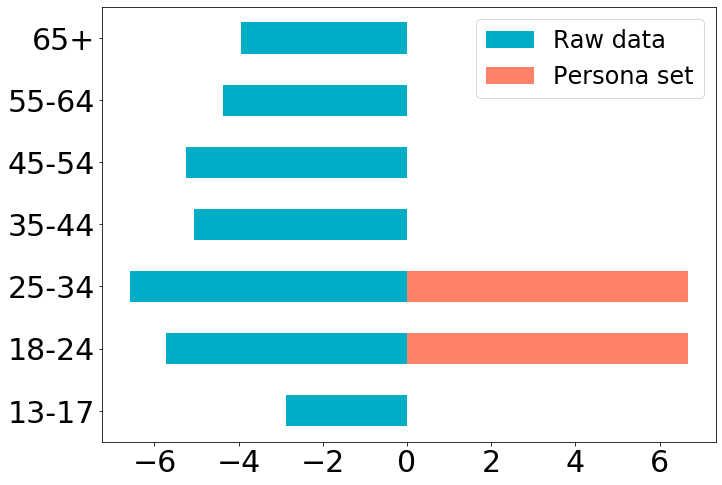

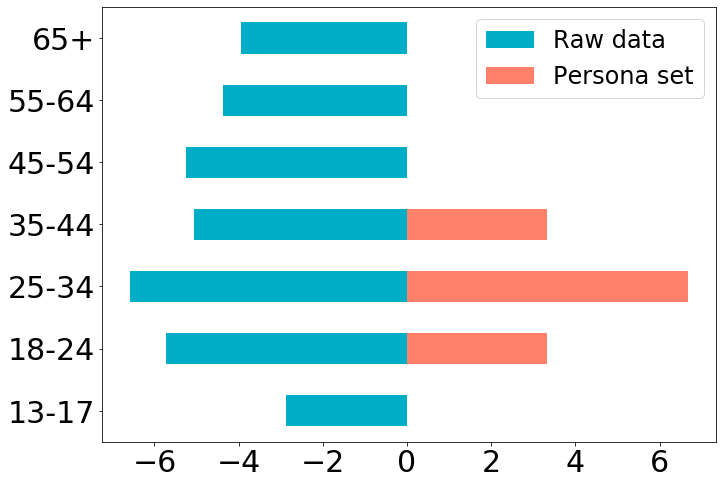

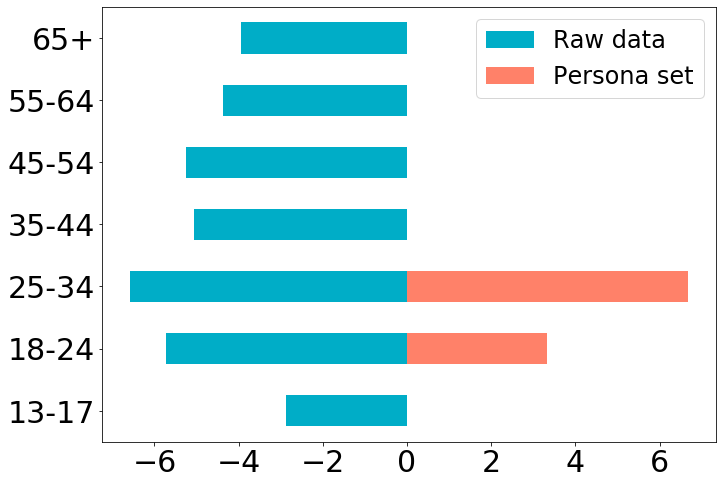

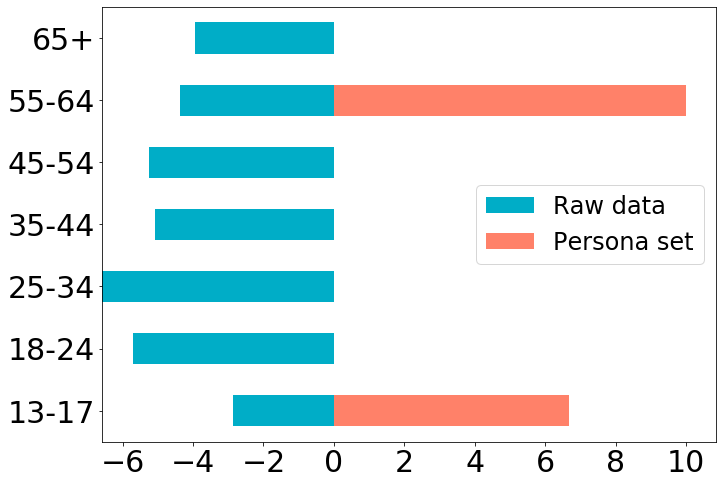

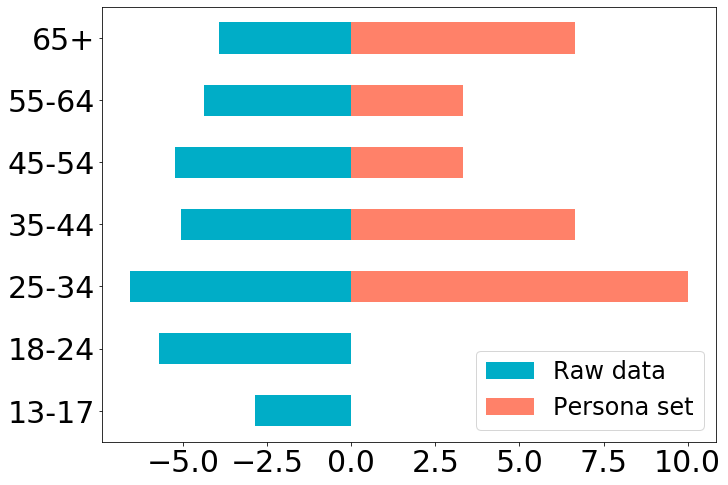

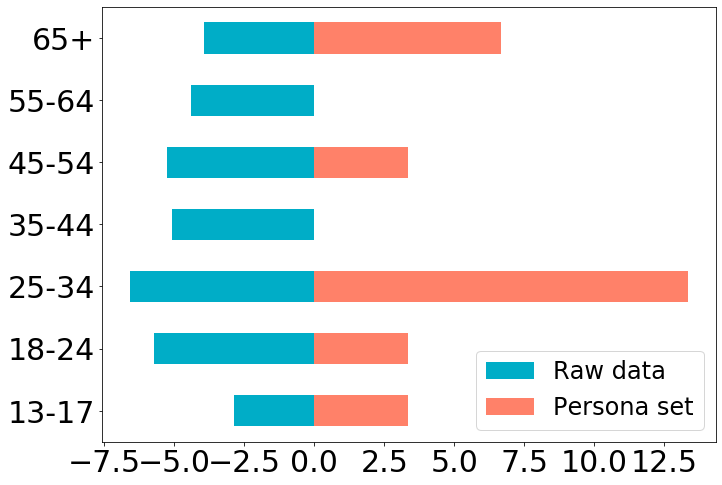

In [35]:
keys = df.age.unique().tolist()

for dralgo in dralgos:
    for i in range(3):
        if i == 0:
            temp = pd.read_excel("personas/"+dralgo+".xlsx",sheet_name=2-i)
            temp = fixAge(temp).transpose().iloc[1:,:]
        else:
            temp = pd.concat([temp,fixAge(pd.read_excel(dralgo+".xlsx",sheet_name=2-i)).transpose().iloc[1:,:]])


    dummy = pd.DataFrame([],columns=["Raw data", "Persona set"],index=keys)
    for i in range(dummy.shape[0]):
        dummy['Raw data'].iloc[i] = -df.loc[(df.age==keys[i]) & (df.gender=="female")]['sumVideoViews'].sum()/df['sumVideoViews'].sum()*100
        dummy['Persona set'].iloc[i] = temp.loc[(temp[1]==keys[i]) & (temp[2]=="female")].shape[0]/30*100
    likert_colors = ['#00adc7', "#ff8169"]
    dummy.plot.barh(stacked=True, color=likert_colors, edgecolor='none', legend=True,figsize=(11,8),fontsize=30)
    plt.legend(prop={'size': 24})